In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%pwd

'C:\\Users\\nakul'

In [5]:
%cd desktop

C:\Users\nakul\desktop


In [7]:
%pwd

'C:\\Users\\nakul\\desktop'

In [9]:
dataframe = pd.read_csv(r"C:\Users\nakul\Desktop\PYTHON\Zomato_Data.csv")

In [11]:
print(dataframe.head())

                    NAME ONLINE_ORDER TABLE_BOOKINGS RATINGS  VOTES  \
0                  Jalsa          Yes            Yes   4.1/5    775   
1         Spice Elephant          Yes             No   4.1/5    787   
2        San Churro Cafe          Yes             No   3.8/5    918   
3  Addhuri Udupi Bhojana           No             No   3.7/5     88   
4          Grand Village           No             No   3.8/5    166   

   APPOX_COST(For Two People) LISTED_IN(Type)  
0                         800          Buffet  
1                         800          Buffet  
2                         800          Buffet  
3                         300          Buffet  
4                         600          Buffet  


# Exploring The DataSet

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAME                        148 non-null    object
 1   ONLINE_ORDER                148 non-null    object
 2   TABLE_BOOKINGS              148 non-null    object
 3   RATINGS                     148 non-null    object
 4   VOTES                       148 non-null    int64 
 5   APPOX_COST(For Two People)  148 non-null    int64 
 6   LISTED_IN(Type)             148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [15]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", dataframe.shape)

Shape of the DataFrame: (148, 7)


In [17]:
# Check data types
print("\nData Types:\n", dataframe.dtypes)


Data Types:
 NAME                          object
ONLINE_ORDER                  object
TABLE_BOOKINGS                object
RATINGS                       object
VOTES                          int64
APPOX_COST(For Two People)     int64
LISTED_IN(Type)               object
dtype: object


In [19]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", dataframe.describe())


Descriptive Statistics:
              VOTES  APPOX_COST(For Two People)
count   148.000000                  148.000000
mean    264.810811                  418.243243
std     653.676951                  223.085098
min       0.000000                  100.000000
25%       6.750000                  200.000000
50%      43.500000                  400.000000
75%     221.750000                  600.000000
max    4884.000000                  950.000000


In [21]:
# Investigate missing values
print("\nMissing Values:\n", dataframe.isnull().sum())


Missing Values:
 NAME                          0
ONLINE_ORDER                  0
TABLE_BOOKINGS                0
RATINGS                       0
VOTES                         0
APPOX_COST(For Two People)    0
LISTED_IN(Type)               0
dtype: int64


In [23]:
# Explore unique values and frequencies for categorical columns
for col in dataframe.select_dtypes(include=['object']):
    print(f"\nUnique values and frequencies for {col}:")
    print(dataframe[col].value_counts())


Unique values and frequencies for NAME:
NAME
San Churro Cafe               2
CAFE NOVA                     2
Onesta                        2
Jalsa                         1
Kotian Karavali Restaurant    1
                             ..
Kitchen Garden                1
Hotboxit                      1
Domino's Pizza                1
McDonald's                    1
Vijayalakshmi                 1
Name: count, Length: 145, dtype: int64

Unique values and frequencies for ONLINE_ORDER:
ONLINE_ORDER
No     90
Yes    58
Name: count, dtype: int64

Unique values and frequencies for TABLE_BOOKINGS:
TABLE_BOOKINGS
No     140
Yes      8
Name: count, dtype: int64

Unique values and frequencies for RATINGS:
RATINGS
3.8/5     19
3.7/5     15
3.3/5     14
3.4/5     12
4.1/5     11
3.6/5     11
4.0/5     10
3.9/5     10
4.2/5      8
3.1/5      7
2.9/5      7
3.2/5      7
3.5/5      6
3.0/5      2
4.6/5      2
2.8/5      2
4.4/5      2
4.3/5      1
2.6/5      1
3.8 /5     1
Name: count, dtype: int64

Un

In [25]:
# Clean the 'rate' column
dataframe['RATINGS'] = dataframe['RATINGS'].astype(str).str.replace('/5', '')
dataframe['RATINGS'] = dataframe['RATINGS'].astype(float)

In [27]:
display(dataframe.head())

,NAME,ONLINE_ORDER,TABLE_BOOKINGS,RATINGS,VOTES,APPOX_COST(For Two People),LISTED_IN(Type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [29]:
# Calculate the correlation matrix
correlation_matrix = dataframe[['VOTES', 'APPOX_COST(For Two People)', 'RATINGS']].corr()

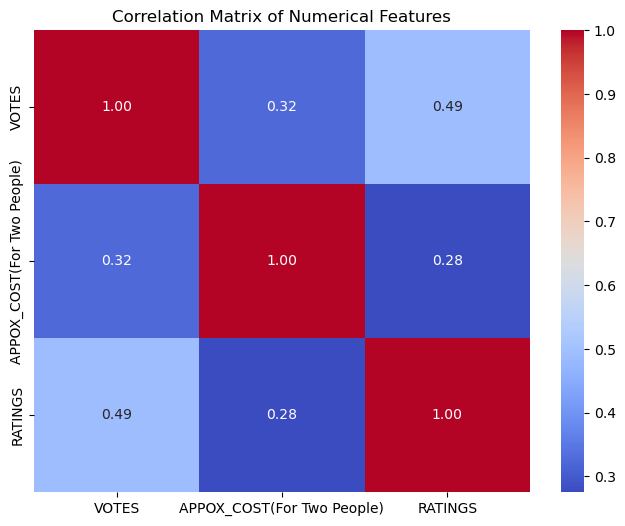

In [31]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [33]:
# Remove duplicate rows
dataframe.drop_duplicates(inplace=True)

# Data Wrangling

In [35]:
# Feature Engineering: Price Categories
# Define price ranges (example - adjust as needed based on domain knowledge or distribution)
def categorize_price(cost):
    if cost <= 500:
        return 'Budget'
    elif cost <= 1000:
        return 'Mid-Range'
    else:
        return 'High-End'

In [37]:
dataframe['PRICE_CATEGORY'] = dataframe['APPOX_COST(For Two People)'].apply(categorize_price)

In [39]:
display(dataframe.head())

,NAME,ONLINE_ORDER,TABLE_BOOKINGS,RATINGS,VOTES,APPOX_COST(For Two People),LISTED_IN(Type),PRICE_CATEGORY
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,Mid-Range
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,Mid-Range
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,Mid-Range
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,Budget
4,Grand Village,No,No,3.8,166,600,Buffet,Mid-Range


# Data Analysis

In [41]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", dataframe.describe())


Descriptive Statistics:
           RATINGS        VOTES  APPOX_COST(For Two People)
count  148.000000   148.000000                  148.000000
mean     3.633108   264.810811                  418.243243
std      0.402271   653.676951                  223.085098
min      2.600000     0.000000                  100.000000
25%      3.300000     6.750000                  200.000000
50%      3.700000    43.500000                  400.000000
75%      3.900000   221.750000                  600.000000
max      4.600000  4884.000000                  950.000000


In [43]:
# Calculate the correlation matrix
correlation_matrix = dataframe[['VOTES', 'APPOX_COST(For Two People)', 'RATINGS']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                VOTES  APPOX_COST(For Two People)   RATINGS
VOTES                       1.000000                    0.324372  0.489844
APPOX_COST(For Two People)  0.324372                    1.000000  0.275216
RATINGS                     0.489844                    0.275216  1.000000


In [45]:
# Relationship between price_category and rate
print("\nRelationship between PRICE_CATEGORY and RATINGS:")
print(dataframe.groupby('PRICE_CATEGORY')['RATINGS'].mean())


Relationship between PRICE_CATEGORY and RATINGS:
PRICE_CATEGORY
Budget       3.569524
Mid-Range    3.788372
Name: RATINGS, dtype: float64


In [47]:
# Aggregations
print("\nAggregations by listed_in(type) and price_category:")
print(dataframe.groupby(['LISTED_IN(Type)', 'PRICE_CATEGORY'])[['RATINGS', 'VOTES', 'APPOX_COST(For Two People)']].mean())


Aggregations by listed_in(type) and price_category:
                                 RATINGS        VOTES  \
LISTED_IN(Type) PRICE_CATEGORY                          
Buffet          Budget          3.700000    88.000000   
                Mid-Range       3.866667   490.000000   
Cafes           Budget          3.680000   144.800000   
                Mid-Range       3.830769   383.538462   
Dining          Budget          3.557609   104.358696   
                Mid-Range       3.644444   597.888889   
other           Budget          3.500000   460.500000   
                Mid-Range       4.050000  1407.666667   

                                APPOX_COST(For Two People)  
LISTED_IN(Type) PRICE_CATEGORY                              
Buffet          Budget                          300.000000  
                Mid-Range                       733.333333  
Cafes           Budget                          405.000000  
                Mid-Range                       653.846154  
Dining    

In [49]:
# Relationship between online_order, book_table, and rate
print("\nAverage rating with/without online ordering:")
print(dataframe.groupby('ONLINE_ORDER')['RATINGS'].mean())


Average rating with/without online ordering:
ONLINE_ORDER
No     3.487778
Yes    3.858621
Name: RATINGS, dtype: float64


In [51]:
print("\nAverage rating with/without table booking:")
print(dataframe.groupby('TABLE_BOOKINGS')['RATINGS'].mean())


Average rating with/without table booking:
TABLE_BOOKINGS
No     3.601429
Yes    4.187500
Name: RATINGS, dtype: float64


# Data Visualization

#### Correlation Matrix Heatmap

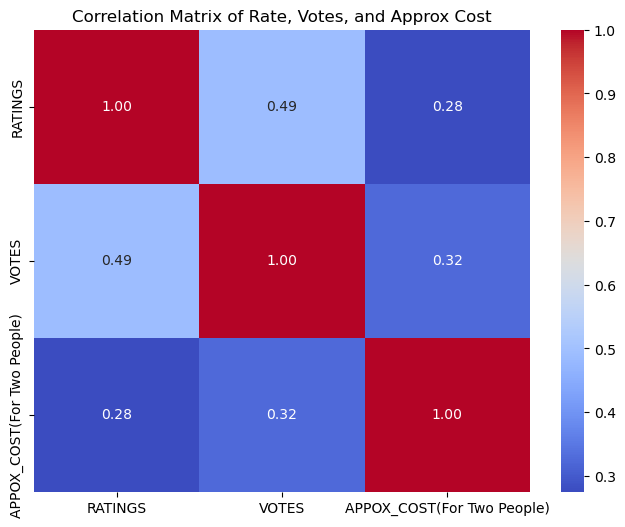

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe[['RATINGS', 'VOTES', 'APPOX_COST(For Two People)']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Rate, Votes, and Approx Cost')
plt.savefig('Correlation_Heatmap.png')
plt.show()

#### Distribution of Restaurant Ratings

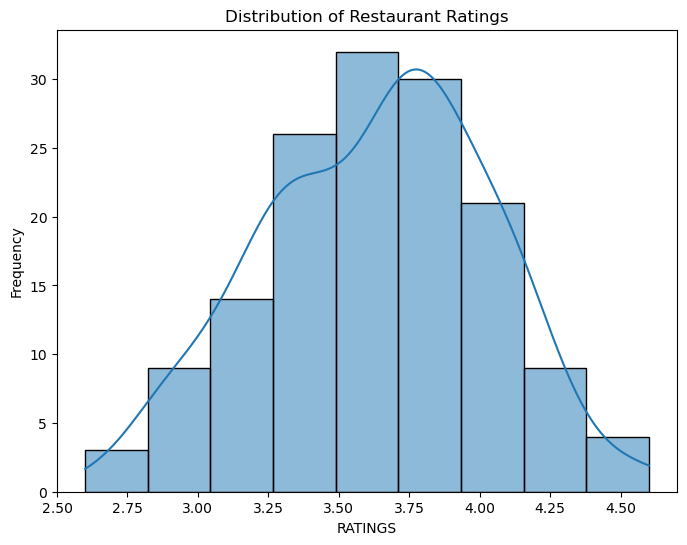

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(dataframe['RATINGS'], kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('RATINGS')
plt.ylabel('Frequency')
plt.savefig('Rating_Histogram.png')
plt.show()

#### Average Rating by Price Category

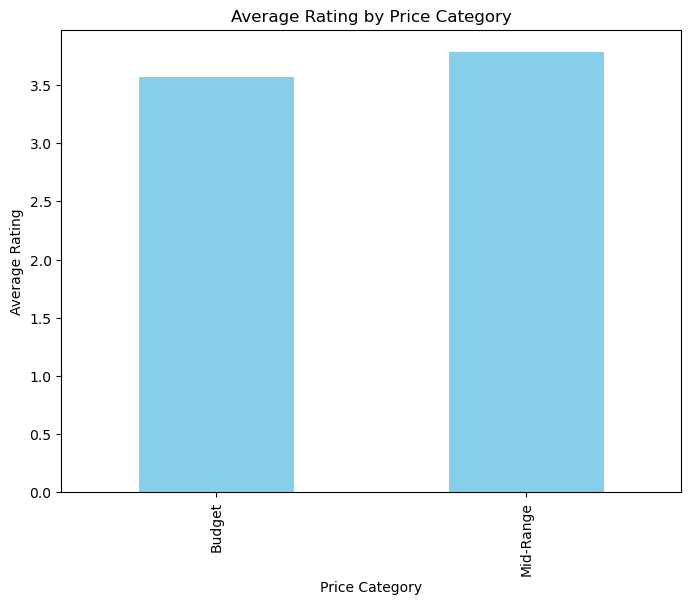

In [85]:
plt.figure(figsize=(8, 6))
dataframe.groupby('PRICE_CATEGORY')['RATINGS'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Rating by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Rating')
plt.savefig('Rating_by_Price.png')
plt.show()

#### Average Rating by Restaurant Type

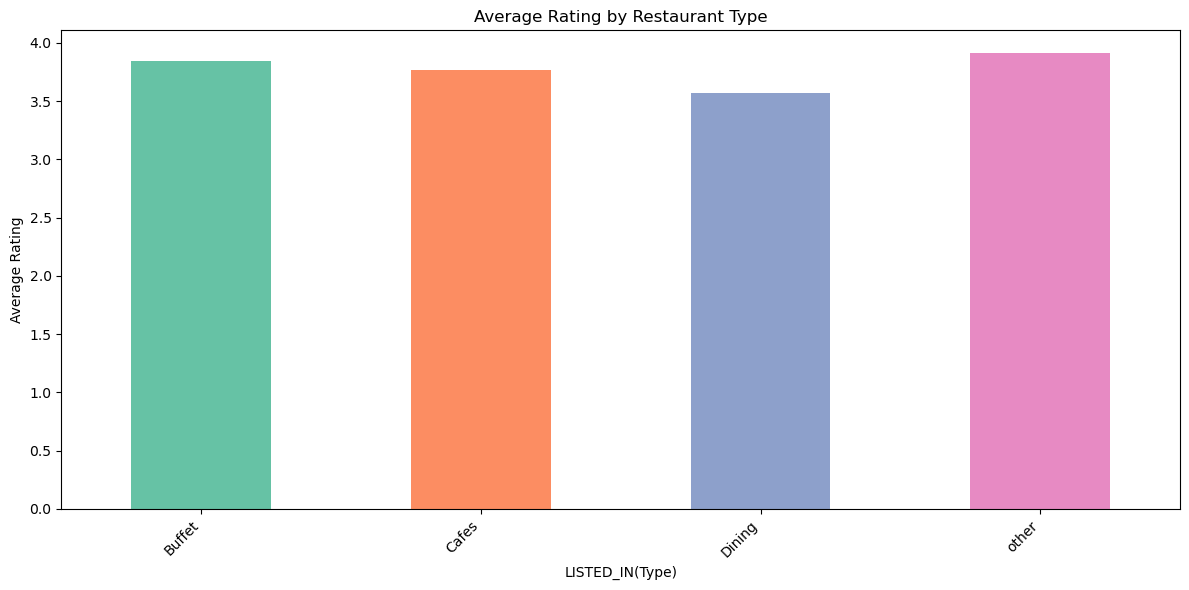

In [88]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
avg_ratings = dataframe.groupby('LISTED_IN(Type)')['RATINGS'].mean()
plt.title('Average Rating by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
colors = sns.color_palette("Set2", len(avg_ratings))
avg_ratings.plot(kind='bar', color=colors)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('Rating_by_Type.png')
plt.show()

#### Relationship between Online Ordering and Average Rating

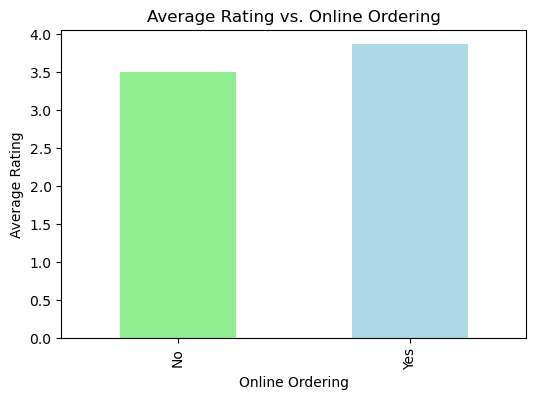

In [92]:
plt.figure(figsize=(6, 4))
dataframe.groupby('ONLINE_ORDER')['RATINGS'].mean().plot(kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Average Rating vs. Online Ordering')
plt.xlabel('Online Ordering')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('Avgrating_vs_Online.png')
plt.show()

#### Relationship between Table Booking and Average Rating

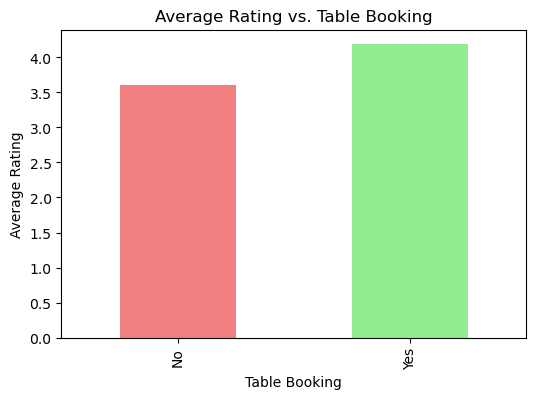

In [94]:
plt.figure(figsize=(6, 4))
dataframe.groupby('TABLE_BOOKINGS')['RATINGS'].mean().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Average Rating vs. Table Booking')
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('Avgrating_vs_Table.png')
plt.show()

#### Average ratings : Online order vs Table bookings

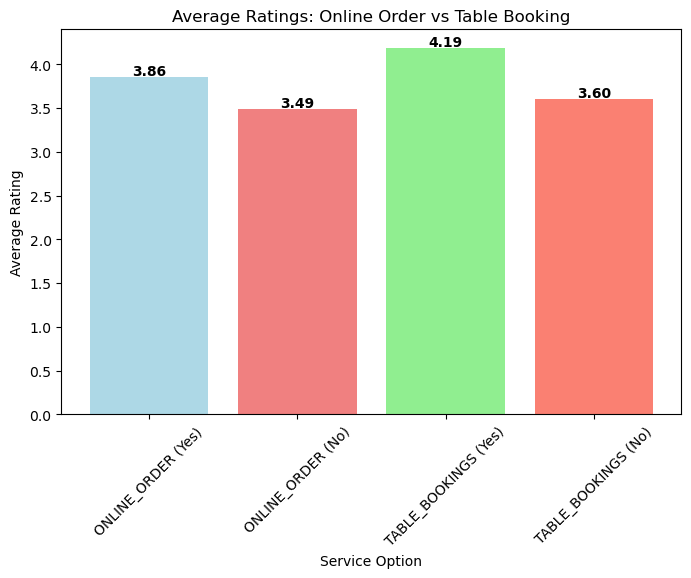

In [67]:
avg_online_order = dataframe.groupby('ONLINE_ORDER')['RATINGS'].mean()
avg_table_booking = dataframe.groupby('TABLE_BOOKINGS')['RATINGS'].mean()

# Prepare values for plotting
categories = ['ONLINE_ORDER (Yes)', 'ONLINE_ORDER (No)', 'TABLE_BOOKINGS (Yes)', 'TABLE_BOOKINGS (No)']
avg_ratings = [
    avg_online_order.get('Yes', 0),
    avg_online_order.get('No', 0),
    avg_table_booking.get('Yes', 0),
    avg_table_booking.get('No', 0)
]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, avg_ratings, color=['lightblue', 'lightcoral', 'lightgreen', 'salmon'])

# Add labels and title
plt.title('Average Ratings: Online Order vs Table Booking')
plt.ylabel('Average Rating')
plt.xlabel('Service Option')

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(avg_ratings):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

# Save the figure
plt.savefig('avg_rating_online_table.png')

# Show the plot
plt.show()

### As per below graph majority of couples prefer Restaurant with an approximate cost of Rs 300.

C:\Users\nakul\AppData\Local\Temp\ipykernel_115816\1778040396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data , palette="viridis")


<Axes: xlabel='APPOX_COST(For Two People)', ylabel='count'>

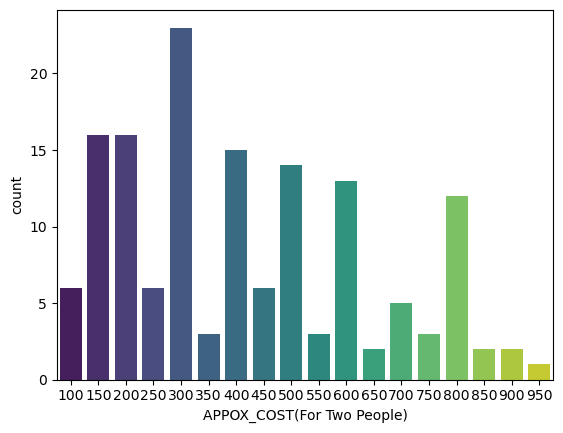

In [69]:
couple_data=dataframe['APPOX_COST(For Two People)'] 
sns.countplot(x=couple_data , palette="viridis")

#### Impact of Online Oredrs on Ratings

C:\Users\nakul\AppData\Local\Temp\ipykernel_115816\2067471075.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ONLINE_ORDER", y="RATINGS", data=dataframe, palette={"Yes": "skyblue", "No": "salmon"})


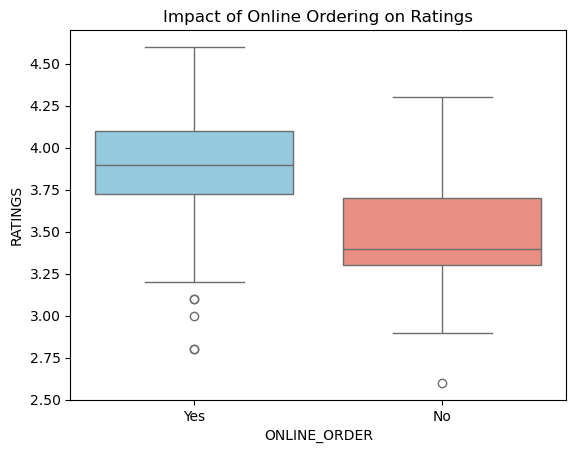

In [71]:
sns.boxplot(x="ONLINE_ORDER", y="RATINGS", data=dataframe, palette={"Yes": "skyblue", "No": "salmon"})
plt.title("Impact of Online Ordering on Ratings")
plt.show()

#### Count of Type of Restaurants in the Data

[Text(0, 0, '7'), Text(0, 0, '23'), Text(0, 0, '8'), Text(0, 0, '110')]

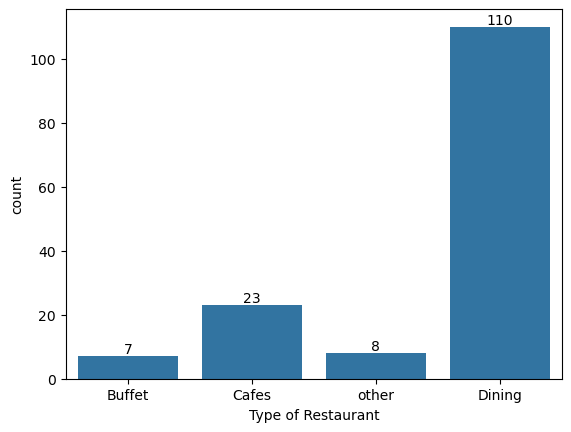

In [105]:
custom_colors = ["#FF6F61", "#6B5B95", "#88B04B", "#FFA07A"]
ax=sns.countplot(x="LISTED_IN(Type)",data=dataframe, )
plt.xlabel("Type of Restaurant")
ax.bar_label(ax.containers[0])

#### Distribution Of Ratings

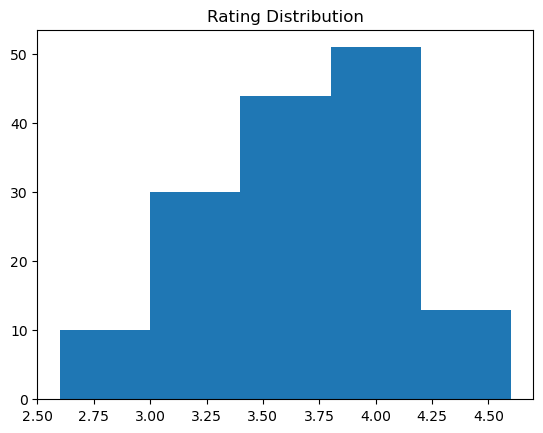

In [75]:
plt.hist(dataframe['RATINGS'],bins=5)
plt.title("Rating Distribution")
plt.show()

#### Type of Restaurants Percentage Wise

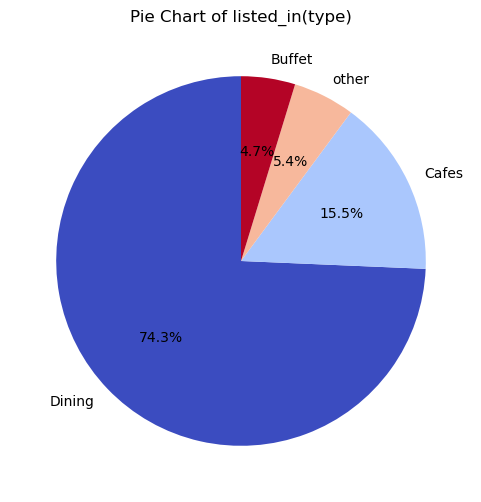

In [110]:
plt.figure(figsize=(6,6))
dataframe['LISTED_IN(Type)'].value_counts().plot.pie(autopct="%.1f%%", startangle=90, cmap="coolwarm")
plt.title("Pie Chart of listed_in(type)")
plt.ylabel('')
plt.show()